In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Markov as mkm
        

# 92.5 3.3 4.2 (5)
# 1 89 10 (10)
# 0 0 100 (0)

In [3]:
x0 = 0
s  = 100
iRate = 0.005
BondPayment = 300 * 0.035
Maturity = 300
LGD = 0.8
LGDReg = 1.0

iStart = s
iStop = x0

symM = mkm.Markov()
symMR = mkm.Markov()

symM.vDefineModel(3)
symMR.vDefineModel(4)

symM.vSetDiscount(iRate)
symMR.vSetDiscount(iRate)

for i in range(iStop,iStart):
    symM.vSetPij(i,0,0, 0.925)
    symM.vSetPij(i,0,1, 0.033)
    symM.vSetPij(i,0,2, 0.042)
    symM.vSetPij(i,1,0, 0.01)
    symM.vSetPij(i,1,1, 0.89)
    symM.vSetPij(i,1,2, 0.10)
    symM.vSetPij(i,2,2, 1.)
    symMR.vSetPij(i,0,0, 0.925-0.05)
    symMR.vSetPij(i,0,1, 0.033)
    symMR.vSetPij(i,0,2, 0.042)
    symMR.vSetPij(i,0,3, 0.05)
    symMR.vSetPij(i,1,0, 0.01)
    symMR.vSetPij(i,1,1, 0.89-0.1)
    symMR.vSetPij(i,1,2, 0.10)
    symMR.vSetPij(i,1,3, 0.10)
    symMR.vSetPij(i,2,2, 1.)
    symMR.vSetPij(i,3,3, 1.)
    for k in [0,1]:
        symM.vSetPost(i,0,k, BondPayment)
        symM.vSetPost(i,1,k, BondPayment)
        symMR.vSetPost(i,0,k, BondPayment)
        symMR.vSetPost(i,1,k, BondPayment)
        symM.vSetPost(i,k,2, Maturity *(1-LGD))
        symMR.vSetPost(i,k,2, Maturity *(1-LGD))
        symMR.vSetPost(i,k,3, Maturity *(1-LGDReg))
       
symM.vSetPost(s-1,0,0, Maturity) 
symM.vSetPost(s-1,0,1, Maturity) 
symM.vSetPost(s-1,1,0, Maturity) 
symM.vSetPost(s-1,1,1, Maturity) 

symMR.vSetPost(s-1,0,0, Maturity) 
symMR.vSetPost(s-1,0,1, Maturity) 
symMR.vSetPost(s-1,1,0, Maturity) 
symMR.vSetPost(s-1,1,1, Maturity)
        
symM.PrintDKs(iStart,iStop)

symMR.PrintDKs(iStart,iStop)
    

Discount 0.9950
Discount 0.9950
   0 :     220.6520       153.5476         0.0000  
   1 :     220.6585       153.5492         0.0000  
   2 :     220.6656       153.5509         0.0000  
   3 :     220.6731       153.5527         0.0000  
   4 :     220.6813       153.5547         0.0000  
   5 :     220.6901       153.5568         0.0000  
   6 :     220.6995       153.5591         0.0000  
   7 :     220.7097       153.5615         0.0000  
   8 :     220.7207       153.5642         0.0000  
   9 :     220.7325       153.5671         0.0000  
  10 :     220.7453       153.5702         0.0000  
  11 :     220.7590       153.5735         0.0000  
  12 :     220.7738       153.5771         0.0000  
  13 :     220.7897       153.5810         0.0000  
  14 :     220.8069       153.5853         0.0000  
  15 :     220.8253       153.5898         0.0000  
  16 :     220.8452       153.5947         0.0000  
  17 :     220.8667       153.6000         0.0000  
  18 :     220.8897       153.60

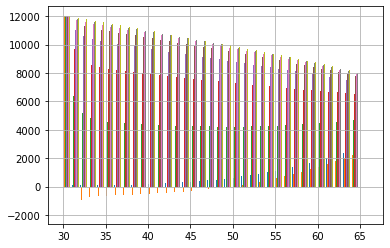

In [3]:
symM.PlotCFs(iStart,iStop)

In [8]:
iReg = 0.10
BondPaymentN = 300 * iReg
x0 = 0
s  = 100
iRate = 0.005

Maturity = 300
LGD = 0.8
LGDReg = 1.0

iStart = s
iStop = x0

symMR2 = mkm.Markov()
symMR2.vDefineModel(4)

symMR2.vSetDiscount(iRate)

for i in range(iStop,iStart):
    symMR2.vSetPij(i,0,0, 0.925-0.05)
    symMR2.vSetPij(i,0,1, 0.033)
    symMR2.vSetPij(i,0,2, 0.042)
    symMR2.vSetPij(i,0,3, 0.05)
    symMR2.vSetPij(i,1,0, 0.01)
    symMR2.vSetPij(i,1,1, 0.89-0.1)
    symMR2.vSetPij(i,1,2, 0.10)
    symMR2.vSetPij(i,1,3, 0.10)
    symMR2.vSetPij(i,2,2, 1.)
    symMR2.vSetPij(i,3,3, 1.)
    for k in [0,1]:

        symMR2.vSetPost(i,0,k, BondPaymentN)
        symMR2.vSetPost(i,1,k, BondPaymentN)
       
        symMR2.vSetPost(i,k,2, Maturity *(1-LGD))
        symMR2.vSetPost(i,k,3, Maturity *(1-LGDReg))


symMR2.vSetPost(s-1,0,0, Maturity) 
symMR2.vSetPost(s-1,0,1, Maturity) 
symMR2.vSetPost(s-1,1,0, Maturity) 
symMR2.vSetPost(s-1,1,1, Maturity)
        
symMR2.PrintDKs(iStart,iStop)

Discount 0.9950
   0 :     267.5019       151.9768         0.0000         0.0000  
   1 :     267.5019       151.9768         0.0000         0.0000  
   2 :     267.5019       151.9768         0.0000         0.0000  
   3 :     267.5019       151.9768         0.0000         0.0000  
   4 :     267.5019       151.9768         0.0000         0.0000  
   5 :     267.5019       151.9768         0.0000         0.0000  
   6 :     267.5020       151.9768         0.0000         0.0000  
   7 :     267.5020       151.9768         0.0000         0.0000  
   8 :     267.5020       151.9769         0.0000         0.0000  
   9 :     267.5020       151.9769         0.0000         0.0000  
  10 :     267.5021       151.9769         0.0000         0.0000  
  11 :     267.5021       151.9769         0.0000         0.0000  
  12 :     267.5021       151.9769         0.0000         0.0000  
  13 :     267.5022       151.9769         0.0000         0.0000  
  14 :     267.5022       151.9769         0.0